In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline


import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
pd.set_option('display.max_rows', 1000)

mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

sns.set(style = "darkgrid")

In [23]:
import dash 
import dash_core_components as dcc
import dash_html_components as html
import missingno as msno

In [24]:
V_url = "https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv"
df_Vacc = pd.read_csv(V_url)

In [25]:
df_plot = pd.read_csv(r"C:\Users\jaina\eds_covid-19_analysis\data\processed\COVID_small_flat_table.csv", sep  =';')

In [26]:
country_list = ['Italy', 'US', 'Canada']

In [27]:
df_Iplot = df_plot
for country in country_list:
    df_Iplot[ country + " % Infected"] = (df_plot[country])/(df_Vacc[df_Vacc['Country_Region']== country]['Population'].max())

In [28]:
df_Iplot

,date,Italy,US,Spain,Germany,India,Canada,Russia,Switzerland,Italy % Infected,US % Infected,Canada % Infected
0,2020-01-22,0,1,0,0,0,0,0,0,0.000000,3.035212e-09,0.000000e+00
1,2020-01-23,0,1,0,0,0,2,0,0,0.000000,3.035212e-09,5.283220e-08
2,2020-01-24,0,2,0,0,0,3,0,0,0.000000,6.070424e-09,7.924830e-08
3,2020-01-25,0,2,0,0,0,3,0,0,0.000000,6.070424e-09,7.924830e-08
4,2020-01-26,0,5,0,0,0,3,0,0,0.000000,1.517606e-08,7.924830e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2022-06-26,18234242,87043484,12681820,27771911,43407046,3941185,18150010,3726615,0.301583,2.641954e-01,1.041107e-01
887,2022-06-27,18259261,87169559,12681820,27914240,43418839,3942058,18152652,3726615,0.301997,2.645781e-01,1.041338e-01
888,2022-06-28,18343422,87296327,12734038,28048190,43433345,3945493,18155165,3759730,0.303388,2.649629e-01,1.042245e-01
889,2022-06-29,18438877,87490815,12734038,28180861,43452164,3948112,18158163,3759730,0.304967,2.655532e-01,1.042937e-01


<AxesSubplot:>

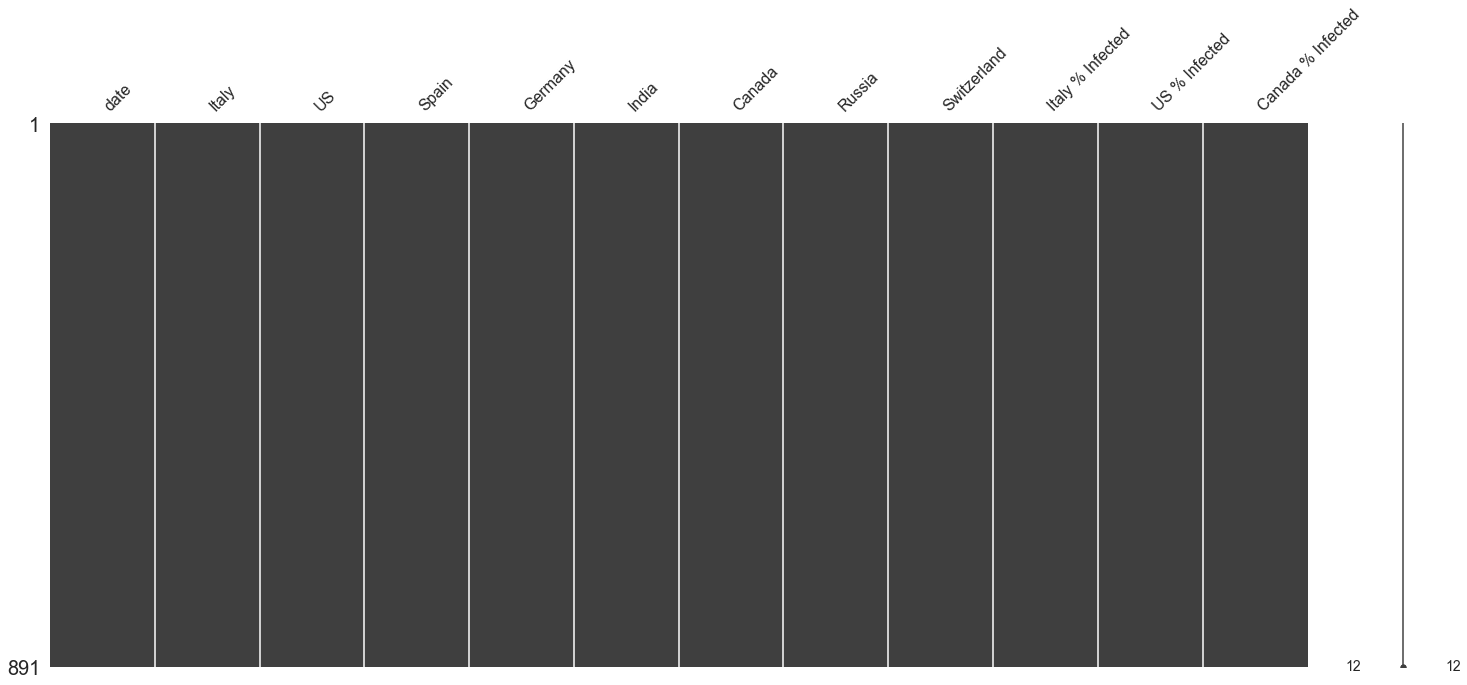

In [29]:
msno.matrix(df_Iplot)

<AxesSubplot:>

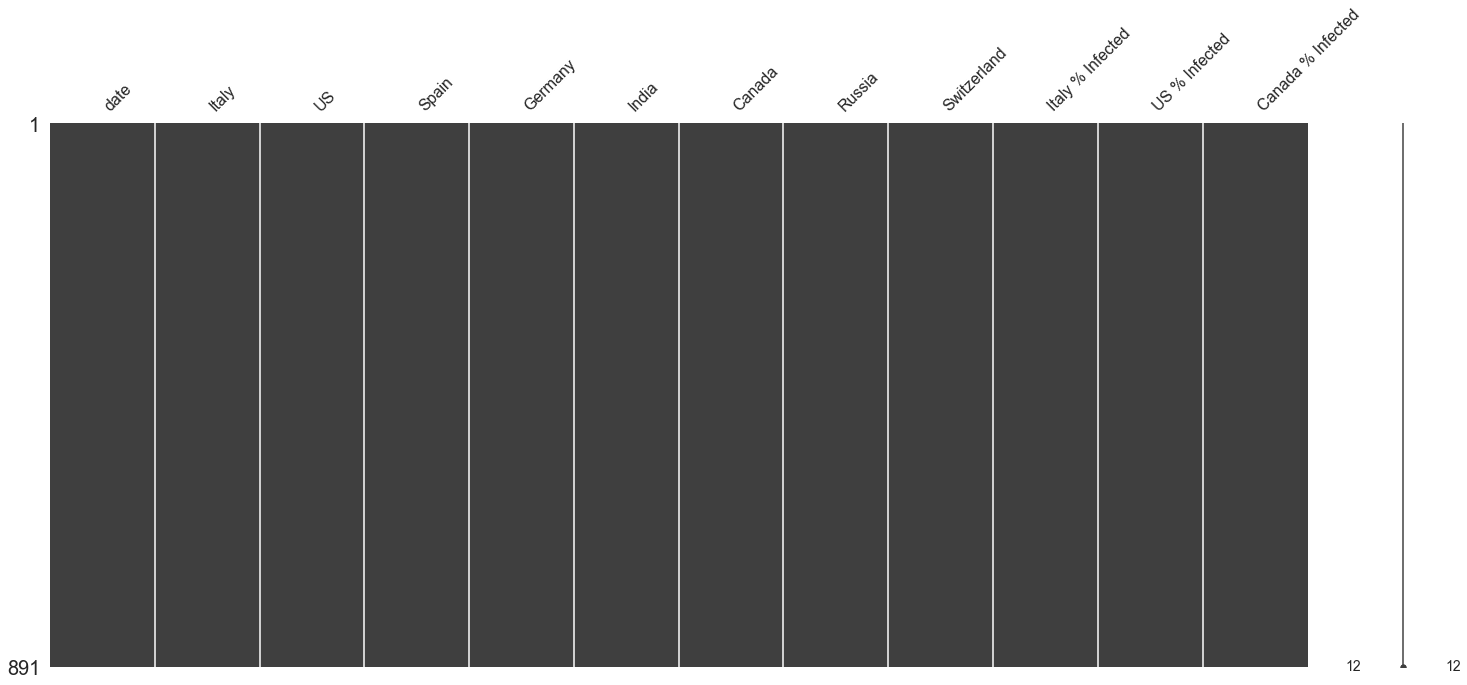

In [30]:
df_Iplot.interpolate(method = 'linear', limit_direction = 'backward', inplace = True)
msno.matrix(df_Iplot)

In [31]:
fig = go.Figure()

# definition of plotting individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x = df_Iplot.date, 
                             y = df_Iplot[each+" % Infected"], 
                             mode = 'markers+lines',
                             opacity =0.8,
                             name =each, 
                             line_width = 2, 
                             marker_size =4
                            )
                 )
    
# layout inputs
fig.update_layout(xaxis_title = "Time", 
                  yaxis_title = "Percentage_of_Infected_Population (source johns hopkins csse, log-scale",
                  width = 1000, 
                  height = 500)

#fig.update_yaxes(type = 'log', range = [1.1, 9])
#fig.update_layout(xaxis_rangeslider_visible = True)
#fig.show(renderer = 'chrome')
fig.update_layout(
    title_text="Relative_Covid_Infections")
fig.show()

In [32]:
fig.write_image('Relative_COVID_Infections.jpeg')    # for exporting the image in jpeg format 

In [ ]:
app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id = 'country_drop_down',
        options = [
            {'label': 'Italy', 'value':'Italy'},
            {'label': 'US', 'value':'US'},
            {'label': 'Spain', 'value':'Spain'},
            {'label': 'Germany', 'value':'Germany'},
            {'label': 'India', 'value':'India'},
            {'label': 'Canada', 'value':'Canada'},
            {'label': 'Russia', 'value':'Russia'},
            {'label': 'Switzerland', 'value':'Switzerland'}
        ], 
        value = ['US', 'Italy'], 
        multi = True 
    ), 
    dcc.Graph(figure = fig, id = 'main_window_slope')
])

In [ ]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
   
    traces = []
    for each in country_list:
        traces.append(dict(x = df_Iplot.date,
                           y = df_Iplot[each+" % Infected"],
                           mode = 'markers+lines',
                           opacity = 0.8,
                           line_width = 2,
                           marker_size = 4,
                           name = each))
    
    
    return{
        'data':traces,
        'layout': dict (
                width= 1980,
                height=1080,
                xaxis_title="Time",
                yaxis_title="Confirmed Infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,9]'
                      }
        )
    }


In [ ]:
app.run_server(debug = True, use_reloader = False)